<a href="https://colab.research.google.com/github/r357/Econometrics2/blob/master/Autocorrelation_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autocorrelation Simulation Experiment
## Econometrics 2
### Alen Rožac, 19121848 (alenrozac@gmail.com)



In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Static regression** - data generating process (DGP):
$$ y_t = \alpha + \beta x_t + u_t $$

Compare the case where $u_t$ is white noise and the case where:
$$ u_t = \rho u_{t-1} + v_t $$

Parameters of DGP: 
$\alpha=1, \beta=1, \rho= 0.5$
***
**AR(1) model** - DGP
$$ y_t = \beta y_{t-1} + u_t $$

Parameters of DGP: $\beta=0.5, \rho=0.5$

In [0]:
# Generate noise
def noise(T=1000, mean=0, std=0.5):
    return (np.random.normal(loc=mean, scale=std, size=T))


# Generate random from normal distribution
def normal(T=1000, mean=1, std=2):
    return (np.random.normal(loc=mean, scale=std, size=T))


# Calculate slope (b)
from scipy.stats import linregress    
def slope(y, x):
    slope, intercept,_,_,_ = linregress(x, y)
    return(slope)


# Calculate no constant slope(b)
import statsmodels.api as sm
def slope2(y, x):
    result = sm.OLS(y, x).fit()
    return(float(result.params))

In [0]:
# Functions to return regression variables. DGP returns y and x (or y_t-1 in ac case)

# Static DGP - White Noise
def StaticDGP_wn(alpha=1, beta=1):
    x = normal()
    u_wn = noise()
    y_wn = alpha + beta*x + u_wn
    return(y_wn, x)


# Static DGP - Residual Autocorrelation
def StaticDGP_ac(alpha=1, beta=1, rho=0.5, T=1000):
    x = normal()
    ut_ac = np.zeros(T)
    for t in range(1,T):
        ut_ac[t] = rho * ut_ac[t-1] + noise(1) 
    y_ac = alpha + beta*x + ut_ac
    return(y_ac, x)


# Dynamic DGP - White Noise
def DynamicDGP_wn(beta=0.5, T=1000):
    yt_wn = np.ones(T)
    for t in range(1,T):
        yt_wn[t] = beta * yt_wn[t-1] + noise(1)
    return(yt_wn, np.roll(yt_wn, -1))


# Dynamic DGP - Residual Autocorrelation
def DynamicDGP_ac(beta=0.5, rho=0.5, T=1000):
    ut_ac, yt_ac = np.zeros(T), np.ones(T)
    for t in range(1,T):
        ut_ac[t] = rho * ut_ac[t-1] + noise(1)
        yt_ac[t] = beta * yt_ac[-1] + ut_ac[t]
    return(yt_ac, np.roll(yt_ac, -1))
    

## Simulation 1: Static Regression

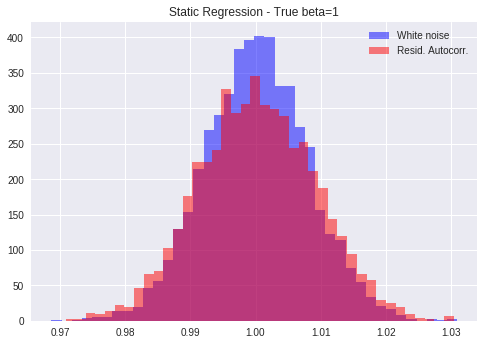

In [0]:
simulations = 5000
b_wn, b_ac = [],[]

for n in range(simulations):
    y_wn, x_wn = StaticDGP_wn()
    y_ac, x_ac = StaticDGP_ac()
    b_wn.append(slope(y_wn, x_wn))
    b_ac.append(slope(y_ac, x_ac))
    
# Plot Histograms    
plt.hist(b_wn, bins=40, alpha=0.5, color="b", label="White noise")
plt.hist(b_ac, bins=40, alpha=0.5, color="r", label="Resid. Autocorr.")
plt.title("Static Regression - True beta=1")
plt.legend();

## Simulation 2: AR(1) Model

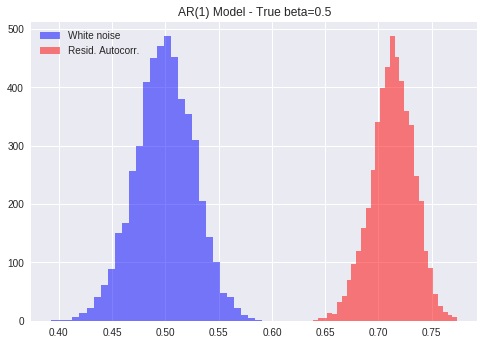

In [0]:
simulations = 5000
bar_wn, bar_ac = [],[]

for n in range(simulations):
    yt_wn, yt1_wn = DynamicDGP_wn()
    yt_ac, yt1_ac = DynamicDGP_ac()
    bar_wn.append(slope2(yt_wn, yt1_wn))
    bar_ac.append(slope2(yt_ac, yt1_ac))
    
# Plot Histograms:
plt.hist(bar_wn, bins=30, alpha=0.5, color="b", label="White noise")
plt.hist(bar_ac, bins=30, alpha=0.5, color="r", label="Resid. Autocorr.")
plt.title("AR(1) Model - True beta=0.5")
plt.legend();